# PB016: Artificial intelligence I, labs 12 - Deep learning

Today's topic is a quick and dirty introduction into deep learning. We'll focus namely on:
1. __Dummy deep learning pipeline__
2. __Developing your own deep learning classifier__

---

## 1. Dummy deep learning pipeline

__Basic facts__
- Deep learning consists of designing, training and validating machine learning models based on various [neural architectures](https://en.wikipedia.org/wiki/Types_of_artificial_neural_networks) that typically involve multiple (hidden) layers consisting of many neural computing units (a simple example of one unit is [perceptron](https://en.wikipedia.org/wiki/Perceptron), such as the one we implemented in the previous labs).
- An example of a deep learning architecture:

<img src="https://www.fi.muni.cz/~novacek/courses/pb016/labs/img/stacked-representation.png" alt="architecture" width="550px" title="Original image source: Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. ”Deep learning.” MIT press, 2016. (Chap. 1) License: Probably OK to use for academic purposes; for any other use, contact the publisher (MIT Press)."/>

- A number of libraries seamlessly integrating with parallel computational architectures is available for developing deep learning models. Some of the popular examples are:
 - [PyTorch](https://pytorch.org/) - originally a general-purpose ML library written in C, now a state-of-the-art deep learning framework with relatively easy-to-use Python (and C++) abstraction layers.
 - [TensorFlow](https://www.tensorflow.org/) - a general-purpose, highly optimised library for multilinear algebra and statistical learning.
 - [Keras](https://keras.io/) - formerly a separate project, now an abstraction layer for user-friendly development of deep learning models integrated with TensorFlow, PyTorch and [JAX](https://jax.readthedocs.io/).

### A warm-up task - predicting onset of diabetes using Keras
- This is based on a widely used PIMA Indians dataset - a classic machine learning sandbox data described in detail for instance [here](https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe).
- The task is to use that dataset to train a classifier for predicting whether or not a person develops diabetes.
- This is based on a number of characteristics (i.e., features) like blood pressure or body mass index.

#### Loading the data using [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)

In [1]:
# importing the library for handy CSV file processing
import pandas as pd

# loading the data, in CSV format, from the web
dataframe = pd.read_csv('https://www.fi.muni.cz/~novacek/courses/pb016/labs/data/12/example/diabetes.csv')

# checking the first few rows of the CSV
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Creating the data structures representing features and labels

In [2]:
# getting just the Outcome column as the vector of labels
# - note that the column contains 0, 1 values that correspond to negaive
#   (no diabetes developed) and positive (diabetes developed) example labels,
#   respectively
df_labels = dataframe.Outcome.values.astype(float)
# the features are the data minus the label vector
# - this contains the remaining features present in the data
df_features = dataframe.drop('Outcome',axis=1).values

### Splitting the data into train and test sets using [scikit-learn](https://sklearn.org/)

In [3]:
# importing a convenience data splitting function from scikit-learn

from sklearn.model_selection import train_test_split

# computing a random 80-20 split (80% training data, 20% of remaining
# "unseen" data for testing the model trained on the 80%)

x_train, x_test, y_train, y_test = train_test_split(df_features,df_labels,\
                                                    test_size=0.2,\
                                                    random_state=42)

### Training a baseline, classical machine learning model (logistic regression)

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

### Evaluating the baseline model

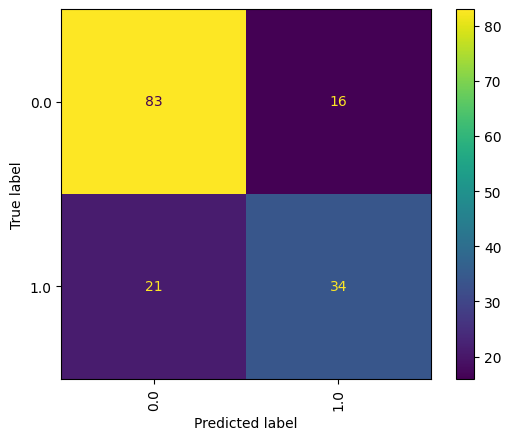

In [5]:
# using the trained model to predict the test labels
y_pred = logreg.predict(x_test)

# importing stuff needed to display a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
# making plots prettier
import seaborn as sns

ConfusionMatrixDisplay.from_estimator(
    logreg, x_test, y_test, xticks_rotation="vertical"
)

In [6]:
# importing some widely-used scoring functions from scikit-klearn

from sklearn.metrics import f1_score, precision_score, recall_score

# computing the precision, recall and F1 scores from the predictions
score_p = precision_score(y_test, y_pred, average='macro')
score_r = recall_score(y_test, y_pred, average='macro')
score_f = f1_score(y_test, y_pred, average='macro')
# using a scoring method of the model itself (to compute accuracy)
score_a = logreg.score(x_test, y_test)

# printing out the scores
print('Various scores of the logistic regression classifier on the test set')
# the number of correct predictions (true positives and true negatives)
# divided by the number of all predictions
print('  - accuracy :', score_a)
# the number of patients correctly classified as high risk
# divided by the number of all patients classified as high risk
print('  - precision:', score_p)
# the number of patients correctly classified as high risk,
# divided by the number of all patients that really are high risk
print('  - recall   :', score_r)
# aggregation of the precision and recall values (harmonic mean)
print('  - F1       :', score_f)

Various scores of the logistic regression classifier on the test set
  - accuracy : 0.7597402597402597
  - precision: 0.7390384615384615
  - recall   : 0.7282828282828282
  - F1       : 0.7326765188834155


### Creating a [Keras](https://keras.io/) model

In [7]:
# adapted from:
#   - https://www.kaggle.com/code/atulnet/pima-diabetes-keras-implementation

# importing the basics from Keras
from keras.models import Sequential
from keras.layers import Dense, Input

# a model for simple sequential stacking of layers
model = Sequential()

# 1st layer: implicit input layer corresponding to the feature vector of size 8
model.add(Input(shape=(8,)))
# 2nd layer: 100 fully connected nodes, a simple non-linear activation
#            (ReLU - rectified linear unit)
model.add(Dense(100, activation='relu'))
# output layer: dim=1, sigmoid activation
#               (probability of the input characteristic of the positive class)
model.add(Dense(1, activation='sigmoid'))

# compiling the model with the binary cross-entropy loss (predicting 0/1)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2024-12-11 22:42:42.531277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733953362.573589 3761868 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733953362.583187 3761868 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 22:42:42.619035: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-11 22:42:47.075654: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

### Training the created model

In [24]:
# simply calling the fit function, training on the training data and validating
# on the test data after each epoch
model.fit(x_train,y_train,epochs=300,\
          validation_data=(x_test, y_test))

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7991 - loss: 0.4556 - val_accuracy: 0.6818 - val_loss: 0.6808
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7661 - loss: 0.4669 - val_accuracy: 0.7078 - val_loss: 0.6412
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7872 - loss: 0.4135 - val_accuracy: 0.6883 - val_loss: 0.7764
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7933 - loss: 0.4523 - val_accuracy: 0.6234 - val_loss: 0.8352
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7888 - loss: 0.4782 - val_accuracy: 0.7143 - val_loss: 0.6578
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8046 - loss: 0.4076 - val_accuracy: 0.6948 - val_loss: 0.6626
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8295 - loss: 0.4152 - val_accuracy: 0.7078 - val_loss: 0.6409
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7769 - loss: 0.4544 - val_accuracy: 0.7078 - 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[Text(1, 0, '0'), Text(2, 0, '1')]

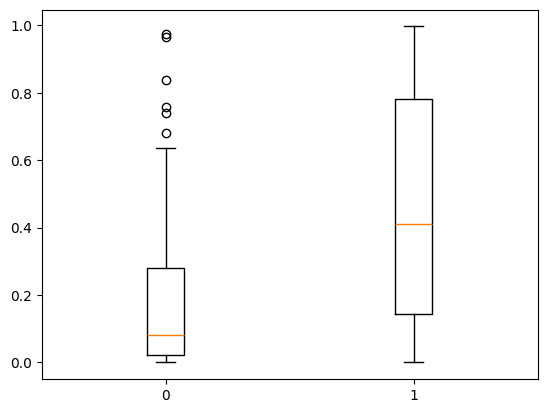

In [26]:
import matplotlib.pyplot as plt

y_predict = model.predict(x_test).flatten()
data = {0: y_predict[y_test==0], 1: y_predict[y_test==1]}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())

- Interpreting the results
 - Not too great:
   - The loss is barely being optimised after about 10 epochs
   - The validation accuracy is worse then the classical ML baseline (barely over 0.7 in most runs as opposed to nearly 0.76)
 - The reasons:
   - More or less default settings of the model
   - More importantly, though, there's no preprocessing of the rather noisy and skewed input data (see for instance [this](https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe) or [this](https://www.kaggle.com/code/atulnet/pima-diabetes-keras-implementation) blog post, where examples of detailed exploratory analysis and input data transformations are described)

---

## 2. Developing your own deep learning classifier
- Your task is to predict which passengers survived the Titanic disaster, as described in the [Kaggle](https://www.kaggle.com) challenge on [Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview).

![titanic](https://www.fi.muni.cz/~novacek/courses/pb016/labs/img/titanic.jpg)

- Split into groups (min 2, max 4 people).
- Register at [Kaggle](https://www.kaggle.com/) so that you can officially participate in the [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) competition  (one account per group is enough).
- Then, use a deep learning library ([Keras](https://keras.io/) might be the easiest option for newbies, but feel free to use for instance [PyTorch](https://pytorch.org/) if that's what you're already comfortable with) to solve the Titanic survivors' prediction problem as follows:
 - Get the challenge [data](https://www.kaggle.com/c/titanic/data) via the URLs in the notebook below.
 - Design a simple neural model for classification of (non)survivors using Keras.
 - Train the model on the `train.csv` dataset (after possibly preprocessing the data).
 - Use the trained model to predict the labels of the set `test.csv` (i.e., the values ​​of the column _"survived"_; for more details, see the competition documentation itself).
 - [Upload results](https://www.kaggle.com/c/titanic/submit) on Kaggle.
- Discuss your model and score with the lab tutor! The collaborating members of the group with the best relative results and/or an interesting/elegant/efficient/unusual model can earn bonus points.


### Loading the train and test data

In [78]:
# importing pandas, just in case it wasn't imported before
import pandas as pd

# loading the train and test data using pandas

df_train = pd.read_csv('https://www.fi.muni.cz/~novacek/courses/pb016/labs/data/12/titanic/train.csv',\
                       index_col='PassengerId')
df_test = pd.read_csv('https://www.fi.muni.cz/~novacek/courses/pb016/labs/data/12/titanic/test.csv', \
                      index_col='PassengerId')

### Checking out the train and test data contents

In [79]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Developing the model itself

In [108]:
train = df_train.sample(frac=0.8,random_state=200)
valid = df_train.drop(train.index)

x_train = train.drop('Survived',axis=1)
y_train = train.Survived.values.reshape(-1, 1)
x_valid = valid.drop('Survived',axis=1)
y_valid = valid.Survived.values.reshape(-1, 1)
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
660,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
526,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
754,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
519,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...
508,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
486,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from numpy import nan

features_to_drop = ["Name", "Ticket"]
categorical_features = ["Pclass", "Sex", "Parch", "Embarked"]
numeric_features = ["Age", "SibSp", "Fare"]
special_features = ["Cabin"]

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

cabin_transformer = Pipeline(
    steps=[
        ("cabinMap", FunctionTransformer(
            func=lambda x: 0 if x is nan else 1
        ))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numeric_transformer, numeric_features),
        #("spec", cabin_transformer, special_features),
    ],
    remainder='drop'
)

classifier = Pipeline(
    steps=[
        #("Dummy", DummyClassifier()),
        ("MLP", MLPClassifier(
            hidden_layer_sizes=(15, 20, 10, 5),
            activation='relu',
            solver='adam',
            alpha=1e-5,
        ))
    ]
)

model = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("classify", classifier),
    ]
)

/home/jindmen/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jindmen/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


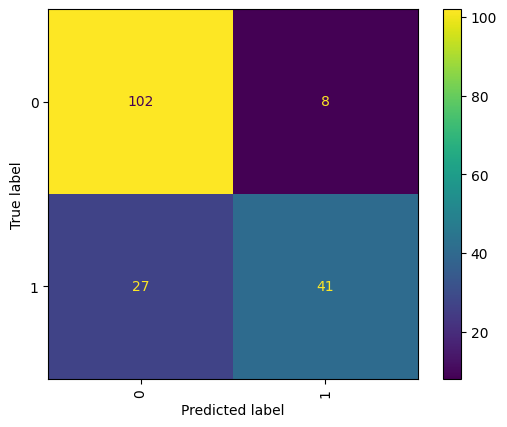

In [133]:
model.fit(x_train, y_train)

ConfusionMatrixDisplay.from_estimator(
    model, x_valid, y_valid, xticks_rotation="vertical"
)

In [135]:
predictions = model.predict(df_test)

### Notes on the solution
- Feel free to get inspired on the web, but make sure you understand what you're doing when using someone else's (be it human or AI) code.
- A practical note on getting the submission file to be uploaded to Kaggle, if you're working in Google Colab:
 - You can create the CSV in your virtual environment, for instance using the `submission.to_csv('submission.csv', index=False)` command, assuming the `submission` variable is a _pandas_ data frame object.
 - Then you can simply download it by first importing the `files` module by the `from google.colab import files` line, and then using the module with the `files.download('submission.csv')` line to store the data on your local machine.
 - To save you some effort, the following code cell contains the Google Colab code that can take care of the above steps, assuming you have generated the `predictions` variable from the Titanic test set using your trained model's `predict()` function.

In [137]:
# the pandas data frame with the results
submission = pd.DataFrame({
    'PassengerId': df_test.index,
    'Survived': predictions,
})

# storing the submissions as CSV
submission.sort_values('PassengerId', inplace=True)
submission.to_csv('submission-example.csv', index=False)

# downloading the created CSV file locally
# from google.colab import files
# files.download('submission-example.csv')

---

#### _Final note_ - the materials used in this notebook are original works credited and licensed as follows:
- Image of Titanic:
 - Retrieved from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:St%C3%B6wer_Titanic.jpg)
 - Author: Willy Stöwer (image reproduction)
 - License: none (or [Public Domain](https://en.wikipedia.org/wiki/public_domain))
- Image of the DL architecture:
 - See the inline note associated with the image itself.